![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)



##<font color='GreeN'>Dicas e Truques de Ciência de Dados </font>

### <font color='BLUE'>Categorical Encoding - O que é ? pra quê fazer? </font>
### <font color='Grey'>Label Encoder e One-Hot Encoder </font>
 


Essas são perguntas típicas de entrevistas de ciência de dados que todo aspirante a cientista de dados precisa saber a resposta. Afinal, você frequentemente terá que fazer uma escolha entre os dois em um projeto de ciência de dados!

As **máquinas entendem números, não texto**. Precisamos converter cada categoria de texto em números para que a máquina os processe usando equações matemáticas. Já se perguntou como podemos fazer isso? Quais são as diferentes maneiras?



![alt text](
https://media2.giphy.com/media/LQiq27myXGPXO6WzAE/giphy.gif)

# **Transformação de Variáveis Categoricas**
### 1° Label Encoder
### 2° One-Hot Encoder 
### 3° Quando usar cada uma?

### **Tipos de Variáveis**

![alt text](https://miro.medium.com/max/786/1*grFS9Tlufu9HmhqfEpjTJw.png)

Como Computador entende números, precisamos então fazer essa transformação, essa codificação dos valores das variáveis. 

Existem várias maneiras de lidar com variáveis ​​categóricas. Neste aula, discutirei as duas técnicas mais amplamente utilizadas: Label e One-Hot Encoder

# Label Encoder

Nessa técnica, cada rótulo (ou cada domínio/cada caracter) **recebe um número inteiro exclusivo** com base **na ordem alfabética.**

In [1]:
import pandas as pd
data = {'Empregador':["Corpo de Bombeiros","Secretaria da Saúde","Polícia Civil", "Secretaria da Saúde",'Polícia Civil'] , 'Idade': [44,34,46,35,23], 'Remuneração': [72000,65000,98000,45000,34000]}
df = pd.DataFrame(data)
df

,Empregador,Idade,Remuneração
0,Corpo de Bombeiros,44,72000
1,Secretaria da Saúde,34,65000
2,Polícia Civil,46,98000
3,Secretaria da Saúde,35,45000
4,Polícia Civil,23,34000


In [ ]:
data

In [ ]:
df.info()

In [4]:
# Import label encoder 
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Country'. 
df['Empregador']= label_encoder.fit_transform(df['Empregador']) 
print(df)

   Empregador  Idade  Remuneração
0           0     44        72000
1           2     34        65000
2           1     46        98000
3           2     35        45000
4           1     23        34000


# Só que a parada é o seguinte:

E se a ordem for importante?

No cenário acima, os nomes dos Empregadores não têm uma ordem ou classificação. 


Mas, quando o LabelEncoder é realizado, os nomes dos Empregadores são classificados com base nos alfabetos. 


Devido a isso, há uma probabilidade muito alta de que o modelo capture a relação **ORDINAL** entre Empregadores. 


Isso é algo que não queremos, porque não é a realizade! 


**Então, como podemos superar esse obstáculo?**

Aí vem o conceito de **One-Hot Encoding .**

# One-Hot Encoder - ou One-Hot Encoding é o processo de criação de variáveis ​​dummy (fictícias).
Nessa técnica de codificação, cada categoria é representada como um vetor one-hot. Vamos ver como implementar a codificação one-hot em Python:

In [5]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder

# creating one hot encoder object 
onehotencoder = OneHotEncoder()

#remodelar a matriz de país 1-D para 2-D, já que fit_transform espera 2-D e finalmente ajusta o objeto
X = onehotencoder.fit_transform(df.Empregador.values.reshape(-1,1)).toarray()
X


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [6]:

#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["Empregador_"+str(int(i)) for i in range(df.shape[1])]) 
df = pd.concat([df, dfOneHot], axis=1)

#droping the country column 
df= df.drop(['Empregador'], axis=1) 

#printing to verify 
print(df.head())

   Idade  Remuneração  Empregador_0  Empregador_1  Empregador_2
0     44        72000           1.0           0.0           0.0
1     34        65000           0.0           0.0           1.0
2     46        98000           0.0           1.0           0.0
3     35        45000           0.0           0.0           1.0
4     23        34000           0.0           1.0           0.0


## Só que a parada é o seguinte:

O One-Hot Encoding, geralmente, resulta em um **Dummy Variable Trap**, pois o resultado de uma variável pode ser facilmente previsto com a ajuda das variáveis ​​restantes.

Que é isso, Eduardo?

A **armadilha de variáveis ​​fictícias** é um cenário em que as variáveis ​​são altamente **correlacionadas** entre si. Um problema conhecido como **multicolinearidade** . 




# Como a gente resolve isso...

Portanto, para superar o problema da multicolinearidade, **uma das variáveis** ​​**dummy deve ser descartada**. 

Vou mostrar na prática como o problema da multicolinearidade é introduzido após realizar a codificação one-hot.



#Uma das maneiras comuns de verificar a multicolinearidade é 
#o Variance Inflation Factor **(VIF):**

VIF = 1, menos multicolinearidade

VIF <5, multicolinearidade moderada

VIF> 5, multicolinearidade extrema (isso é o que devemos evitar)


**Calcule as pontuações VIF :**

In [7]:
# Function to calculate VIF
import statsmodels.api as sm

def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = df.columns

    for i in range(0, x_var_names.shape[0]):
        y = df[x_var_names[i]]
        x = df[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared

        vif = round(1/(1-r_squared),2)
        
        
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

X=df.drop(['Remuneração'],axis=1)
calculate_vif(X)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Var,Vif
4,Empregador_2,22.04
2,Empregador_0,17.40
3,Empregador_1,16.26
0,Idade,11.04
1,Remuneração,9.55


Na saída, podemos ver que as variáveis ​​fictícias que são criadas usando a codificação one-hot têm VIF acima de 5. Temos um problema de multicolinearidade.

In [ ]:
df = df.drop(df.columns[[0]], axis=1)
calculate_vif(df)

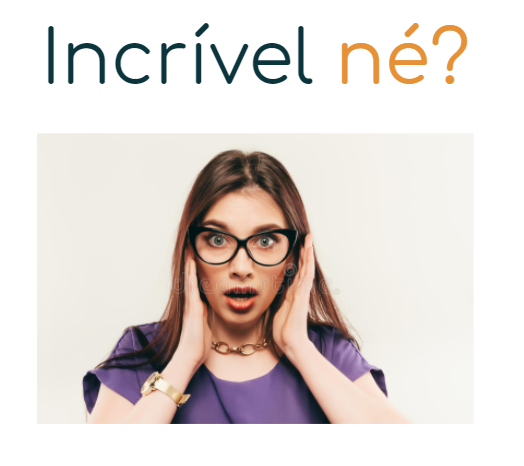

In [10]:
from PIL import Image
%matplotlib inline
im = Image.open("/content/amazing.PNG")
im.show()
im 

Uau! VIF diminuiu. Resolvemos o problema da multicolinearidade. Agora, o conjunto de dados está pronto para construir o modelo.

#**Resumão**
![alt text](https://static.imagensparawhats.com.br/content/assetz/uploads/2018/08/imagens-para-whats-praia-e-mar-gifs.gif)

**Quando usar um Label Encoding vs. One Hot Encoding**

Essa questão geralmente depende do seu conjunto de dados e do modelo que você deseja aplicar. Mesmo assim, alguns pontos a serem observados antes de escolher a técnica de codificação certa para o seu modelo:

**Aplicamos a codificação One-Hot Encoder quando:**

* 1° A característica categórica não é ordinal (como os empregadores acima)

* 2° O número de recursos categóricos é menor, então a codificação one-hot pode ser aplicada de forma eficaz

**Aplicamos a codificação labelEncoder quando:**

* 1° A característica categórica é ordinal (como Jr. Pleno, Sênior, kg, ml, escola primária, escola secundária, doutorado...)

* 2° O número de categorias é bastante grande, pois a codificação one-hot pode levar a um alto consumo de memória



Simbóra!



# Fim

### *Prever o futuro pode ser impossivel. Mas as previsões pelo menos  nos tornam cientes de possibilidades que talvez não levássemos em consideração.*





## Valeu!

### #Links - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="380" height="200" src="https://www.youtube.com/embed/W9iktBS67Iw" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')